In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import macti.visual as mvis

In [2]:
def mesh(L,N):
    x = np.linspace(0,L,N+2)
    return L/(N + 1), x

def plot_sol(x, T, xa, Ta):

    plt.plot(xa,Ta,'k-', lw = 2.0, label='Analítica')
    plt.scatter(x, T, zorder=5, s=100, fc='C1', ec='k', alpha=0.75, label='Numérica')
    plt.plot(x,T, '--', lw=1.0)

    plt.xlabel('x [m]')
    plt.ylabel('T')
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [3]:
def Laplaciano1D(A, f, N, h, ht, Gamma, u, T):
    
    b = ht * (-u / (2*h) + Gamma / h**2)
    c = ht * (u / (2*h) + Gamma / h**2) 
    a = b + c + 1
    
    # Matriz del sistema
    A[0,0] = a 
    A[0,1] = -b
    for i in range(1,N-1):
        A[i,i] = a 
        A[i,i+1] = -b
        A[i,i-1] = -c
    A[N-1,N-2] = -c
    A[N-1,N-1] = a

    # RHS del sistema
    f = np.copy(T[1:N+1])
    f[0]   += T[0] * c
    f[N-1] += T[-1] * b
    
    return A, f

In [4]:
def analytic_sol(par, NP = 100):
    L     = par['L']
    u     = par['u']
    Gamma = par['Gamma']
    t     = par['ht'] * par['Tmax']
    
    xa = np.linspace(0, L, NP)
    
    divisor = 2 * np.sqrt(Gamma * t)
    Ta = 0.5 * (special.erfc((xa - u * t)/ divisor) + 
                np.exp(u * xa) * np.exp(-Gamma) * special.erfc((xa + u * t)/divisor))
    return (xa, Ta)

In [5]:
def fdm_sol(par):
    L     = par['L']
    Gamma = par['Gamma']
    rho   = par['rho']
    u     = par['u']
    N     = par['N']
    T0    = par['BC'][0]
    TL    = par['BC'][1]
    h     = par['h']
    ht    = par['ht']
    Tmax  = par['Tmax']
    freq  = par['freq']
    
    T = np.zeros(N+2)
    T[0] = T0
    T[-1] = TL
    
    x = np.linspace(0,L,N+2)
    
    xa, Ta = analytic_sol(par,200)
    plt.figure(figsize=(10,5))
    plt.plot(xa, Ta, 'k-', lw = 2.0, label='Sol. exacta')
    
    A = np.zeros((N,N))
    f = np.zeros(N)
        
    for i in range(1, Tmax+1):
        A, f = Laplaciano1D(A, f, N, h, ht, Gamma, u, T) # Matriz del sistema

        T[1:N+1] = np.linalg.solve(A,f)

        if (i % freq == 0):
            etiqueta = 'Time = {}'.format(i*ht)
            plt.plot(x, T, '.-', lw = 1.0, label=etiqueta)

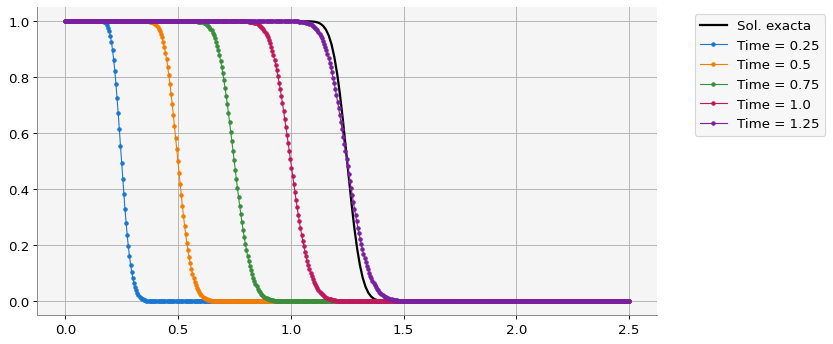

In [7]:
par = {}
par['L']     = 2.5 # m
par['rho']   = 1.0 # kg/m^3
par['u']     = 1.0 # m/s
par['Gamma'] = 0.001 # kg / m.s
par['BC']    = (1.0, 0.0)
par['N']     = 500 # Número de incógnitas
par['Tmax']  = 500
par['ht']    = 0.0025
par['freq']  = 100

h, x = mesh(par['L'], par['N'])

par['h'] = h


fdm_sol(par)

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()